# ANALYSIS

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.colors import to_hex

In [2]:
#Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

## <br> Literacy Rate Analysis <br>
### The working definition of literacy in the Indian census since 1991 is as follows: <br> A person aged seven and above, who can both read and write with understanding in any language.

<img src="../img/literacy_rate_difinition.png" style="width:700px; height:80px" /><br>

,Year,Male,Female,Total,Urban,Rural,Gender_Gap,Net_Change
0,1901,9.80,0.60,5.30,NaN,NaN,9.20,NaN
1,1911,10.60,1.00,5.90,NaN,NaN,9.60,0.40
2,1921,12.20,1.80,7.20,NaN,NaN,10.40,0.80
3,1931,15.60,2.80,9.50,NaN,NaN,12.80,2.40
4,1941,24.90,7.30,16.10,NaN,NaN,17.60,4.80
5,1951,27.16,8.86,18.33,34.59,12.10,18.30,0.70
6,1961,40.40,15.35,28.30,54.40,22.50,25.05,6.75
7,1971,45.96,21.97,34.45,60.20,27.90,23.99,-1.06
8,1981,56.38,29.76,43.57,67.20,36.10,26.62,2.63
9,1991,64.13,39.29,52.21,73.10,44.70,24.84,-1.78


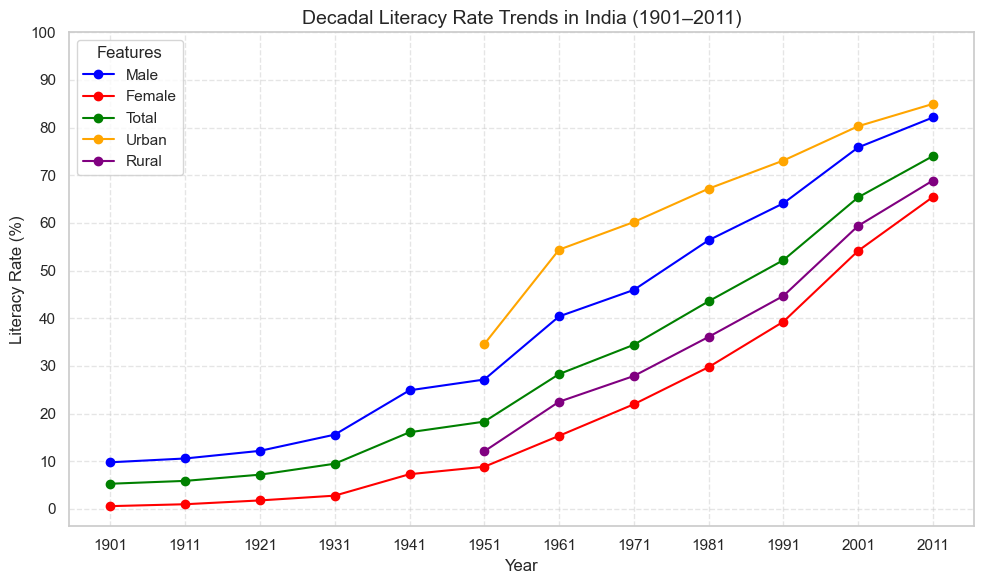

In [3]:
# Loading the dataset
df = pd.read_csv('../dataset/literacy.csv')
df_literacy = pd.read_csv('../dataset/decadal_literacy_rate.csv')
display(df_literacy)

# Visualizing Decadal literacy rate
plt.figure(figsize=(10, 6))

# Plot each line
plt.plot(df_literacy['Year'], df_literacy['Male'], label='Male', color='blue', marker='o')
plt.plot(df_literacy['Year'], df_literacy['Female'], label='Female', color='red', marker='o')
plt.plot(df_literacy['Year'], df_literacy['Total'], label='Total', color='green', marker='o')

# Urban and Rural: Drop NaN values to avoid gaps in plot
plt.plot(df_literacy['Year'].dropna()[df_literacy['Urban'].notna()], 
         df_literacy['Urban'].dropna(), label='Urban', color='orange', marker='o')
plt.plot(df_literacy['Year'].dropna()[df_literacy['Rural'].notna()], 
         df_literacy['Rural'].dropna(), label='Rural', color='purple', marker='o')

# Labels and title
plt.title("Decadal Literacy Rate Trends in India (1901–2011)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Literacy Rate (%)", fontsize=12)
plt.xticks(df_literacy['Year'])  # Ensure all years are shown
plt.yticks(np.arange(0, 101, 10))  # Set y-axis ticks in units of 10
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Features")

plt.tight_layout()
plt.show()

##### Note: Literacy rates for 1951, 1961 and 1971 Censuses relate to population aged five years and above. The rates for the 1981, 1991, 2001 and 2011 Censuses relate to the population aged seven years and above. The 1981 literacy rates exclude Assam where the 1981 Census could not be conducted. The 1991 Census literacy rates exclude Jammu & Kashmir.

##### Source: Census of India, Wikipedia <br> Link: https://en.wikipedia.org/wiki/Literacy_in_India#:~:text=Literacy%20rates%20(age%207%2B)%20by%20decade<br> Link: https://censusindia.gov.in/census.website/data/census-tables<br>

#### Literacy in India grew very slowly until Indian independence in 1947. <br> There is steady growth after post-independence of India. <br> An acceleration in the rate of literacy growth occurred in the 1991–2001 period in the Female and Rural line charts.<br><br>

## <br><br>Gender Gap in Literacy Rate of India

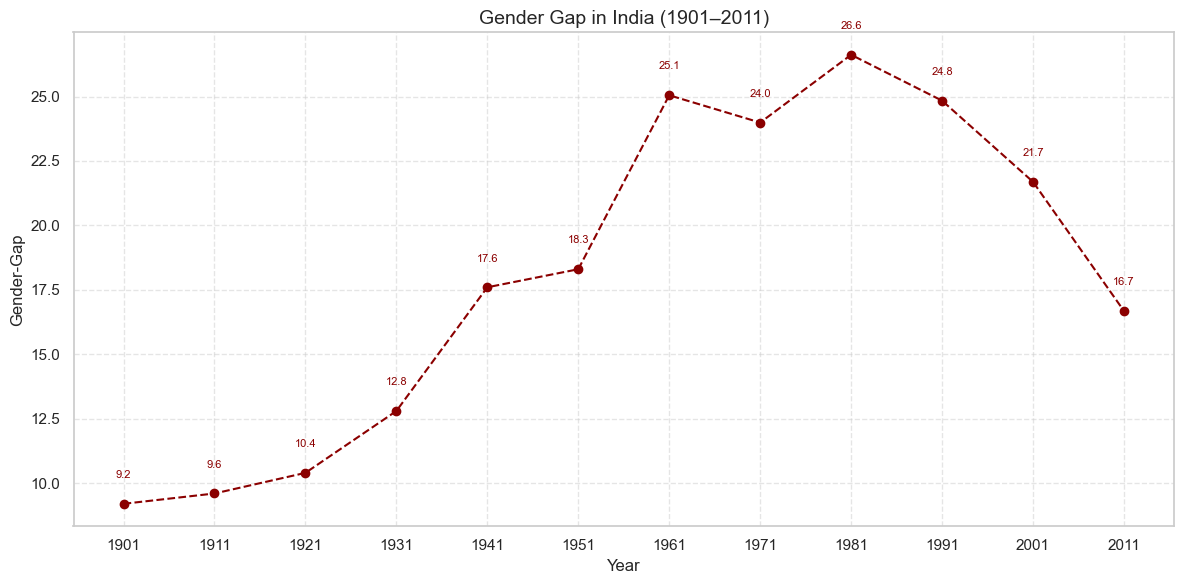

In [4]:
plt.figure(figsize=(12, 6))

# plt.plot(df_literacy['Year'], df_literacy['Male'], color='blue', marker='o', label='Male Literacy')
# plt.plot(df_literacy['Year'], df_literacy['Female'], color='green', marker='o', label='Female Literacy')
plt.plot(df_literacy['Year'], df_literacy['Gender_Gap'], color='darkred', marker='o', linestyle='--', label='Gender Gap (Male - Female)')

# Add labels, title, and legend
plt.title("Gender Gap in India (1901–2011)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gender-Gap", fontsize=12)
plt.xticks(df_literacy['Year'])
plt.grid(True, linestyle='--', alpha=0.5)

for i, year in enumerate(df_literacy['Year']):
    plt.text(year, df_literacy['Gender_Gap'][i] + 1, f"{df_literacy['Gender_Gap'][i]:.1f}", 
             ha='center', fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

##### From 1981 to 2011, female literacy rose ~9 times, whereas male literacy grew ~3 times.<br>The gender disparity in literacy peaked in 1981, with a gap of 26.6 percentage points. 

## <br><br>Health Data Analysis:
#### Data: Age Specific Fertility Rate(ASTF), Total Fertility Rate(TFR), Infant Mortality Rate(IMR), Birth rate, Death Rate.
##### [Scientific Literature in NIH] Multiple linear regression revealed a significant inverse relationship between IMR and female literacy   
##### [Patnaik 1985;Arora 1990] Women Education depresses the fertility by raising the age at marriage, strengthening the propensity to be in labour force, fostering the favourable attitude towards small size norm and improving the awareness and use of family planning methods 

<img src ="../img/asfr_formula.png" style="width:700px; height:80px" /> <br>
<img src ="../img/imr_formula.png" style="width:700px; height:80px" />

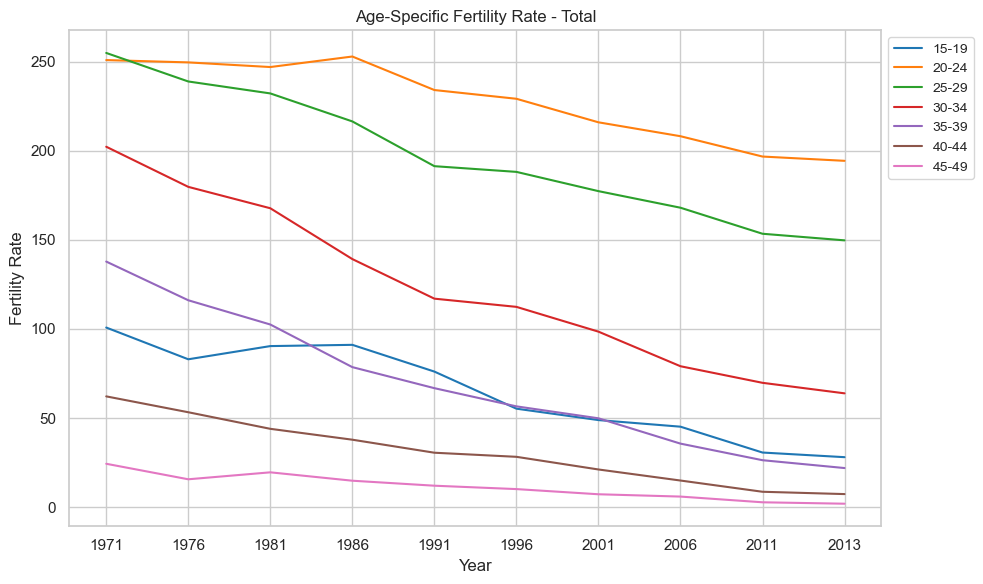

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

# Define file path
total_path = "../dataset/asfr_total.csv"

# Read CSV
df_asfr_total = pd.read_csv(total_path)

# Convert year columns to strings for plotting
years = df_asfr_total.columns[1:]
age_groups = df_asfr_total.iloc[:, 0]

# Transpose the dataframe for plotting
df_total_plot = df_asfr_total.set_index(df_asfr_total.columns[0]).T

# Set the plotting style
sns.set(style="whitegrid")

# Create a single plot
plt.figure(figsize=(10, 6))

# Define a color palette
palette = sns.color_palette("tab10", len(age_groups))

# Plot Total only
for idx, age_group in enumerate(df_total_plot.columns):
    hex_color = to_hex(palette[idx])
    plt.plot(df_total_plot.index, df_total_plot[age_group], label=age_group, color=hex_color)

plt.title("Age-Specific Fertility Rate - Total")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

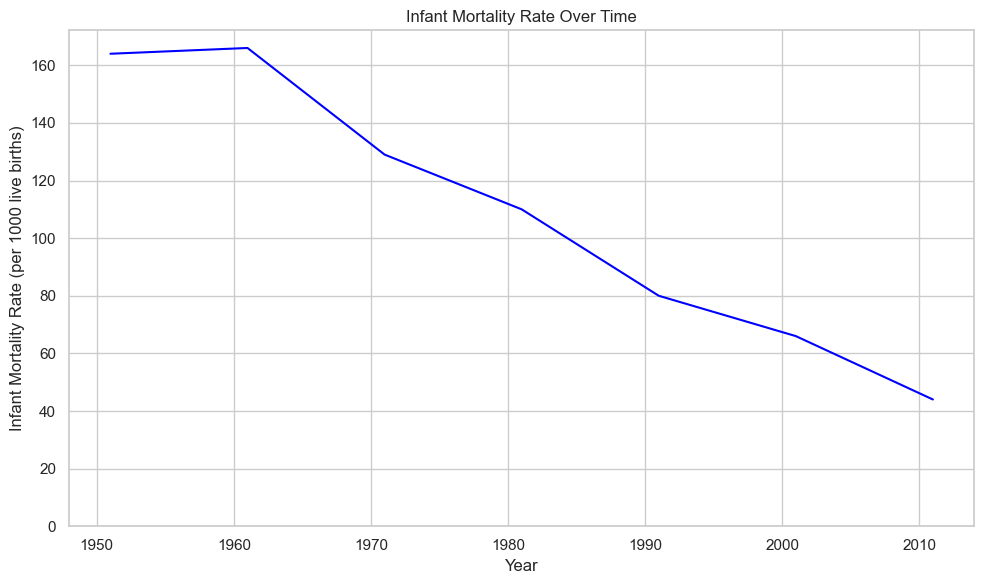

In [6]:
# Read the IMR dataset
imr_path = "../dataset/fertility_IMR_rate.csv"
df_imr = pd.read_csv(imr_path)

# Set the plotting style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))

# Plot the infant mortality rate
plt.plot(df_imr['Year'], df_imr['infant_mortality_rate'], label='Infant Mortality Rate', color='blue')

# Force y-axis to start at 0
plt.ylim(bottom=0)

# Add plot details
plt.title("Infant Mortality Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Infant Mortality Rate (per 1000 live births)")
plt.tight_layout()
plt.show()

##### Source: Compendium of India's Fertility and Mortality Indicators(1971 - 2013), Sample Registration System, Census of India <br> Link: https://censusindia.gov.in/census.website/node/294

### Fertility Rates in India (Total, Rural and Urban) from 1971 to 2013 viewed as univariate time series ages 15-49.
### Key Finding: 
##### I. Age pattern of fertility decline across the reproductive age groups.
##### II. For all three cases the most fertile age group is 20-24
##### III. Except the age categories 20-24 and 25-29 all are declining very fast towards the replacement level.

## <br><br>Population Analysis

,census_year,persons,males,females
0,1901,"23,83,96,327","12,07,91,301","11,73,58,672"
1,1911,"25,20,93,390","12,83,85,368","12,37,08,022"
2,1921,"25,13,21,213","12,85,46,225","12,27,74,988"
3,1931,"27,89,77,238","14,29,29,689","13,57,88,921"
4,1941,"31,86,60,580","16,36,85,302","15,46,90,267"
5,1951,"36,10,88,090","18,55,28,462","17,55,59,628"
6,1961,"43,92,34,771","22,62,93,201","21,29,41,570"
7,1971,"54,81,59,652","28,40,49,276","26,41,10,376"
8,1981,"68,33,29,097","35,33,74,460","32,99,54,637"
9,1991,"84,64,21,039","43,93,58,440","40,70,62,599"


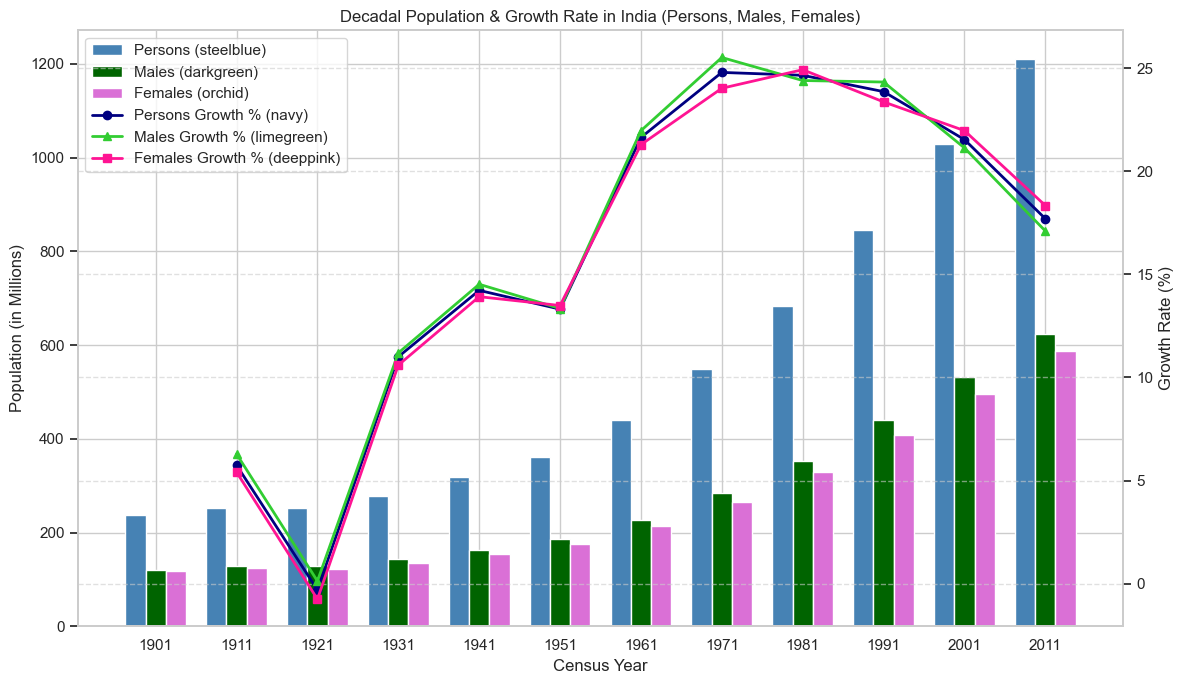

In [7]:
file_path = '../dataset/decadal_population.csv'
df = pd.read_csv(file_path)
display(df)

# Clean and convert population columns to numeric
for col in ['persons', 'males', 'females']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

for col in ['persons', 'males', 'females']:
    df[col + '_growth'] = df[col].pct_change() * 100

# Setup for plotting
x = np.arange(len(df))  # X positions for each decade
bar_width = 0.25

# Create plot
fig, ax1 = plt.subplots()

# Bar chart: population counts
bars1 = ax1.bar(x - bar_width, df['persons'] / 1_000_000, width=bar_width, label='Persons (steelblue)', color='steelblue')
bars2 = ax1.bar(x, df['males'] / 1_000_000, width=bar_width, label='Males (darkgreen)', color='darkgreen')
bars3 = ax1.bar(x + bar_width, df['females'] / 1_000_000, width=bar_width, label='Females (orchid)', color='orchid')


ax1.set_xlabel('Census Year')
ax1.set_ylabel('Population (in Millions)')
ax1.set_title('Decadal Population & Growth Rate in India (Persons, Males, Females)')
ax1.set_xticks(x)
ax1.set_xticklabels(df['census_year'])
ax1.tick_params(axis='y')

# Second Y-axis: growth rate lines
ax2 = ax1.twinx()
ax2.plot(x, df['persons_growth'], color='navy', marker='o', linewidth=2, label='Persons Growth % (navy)')
ax2.plot(x, df['males_growth'], color='limegreen', marker='^', linewidth=2, label='Males Growth % (limegreen)')
ax2.plot(x, df['females_growth'], color='deeppink', marker='s', linewidth=2, label='Females Growth % (deeppink)')
ax2.set_ylabel('Growth Rate (%)')
ax2.tick_params(axis='y')

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

# Final touches
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Source: Census Of India, Table: A02 <br> Link: https://censusindia.gov.in/census.website/data/tables<br>
##### Since 1901, India’s population has grown over fivefold, with the most rapid expansion occurring post-independence.<br>While the decadal growth rate has declined steadily since 1991, the absolute population continues to rise, putting pressure on resources and infrastructure<br>In mid-2023, India officially became the world’s most populous country, surpassing China<br>India , at present, is at stage three of the four stage model of demographic transition

#### Demographic Transition Theory.
##### Stage 1: less developed countries , high birth rate ,high no. of deaths due to preventable causes, stable population <br> Stage 2: Death rates fall due to improved public health but high fertility due to limited access to health and contraceptive services , spurt in population <br> Stage 3: Birth rate also falls, population continues to grow due to large no. of people in reproductive age group <br> Stage 4:Stable population but at a level higher than the initial, low birth & death rates, high social & economic development


### <br><br>Population Structure of India as per Census 2011

,Age-group,Persons,Males,Females
0,0-4,110447164,57119612,53327552
1,5-9,128316790,66734833,61581957
2,10-14,124846858,65632877,59213981
3,15-19,100215890,53939991,46275899
4,20-24,89764132,46321150,43442982
5,25-29,83422393,41557546,41864847
6,30-34,74274044,37361916,36912128
7,35-39,70574085,36038727,34535358
8,40-44,55738297,29878715,25859582
9,45-49,47408976,24867886,22541090


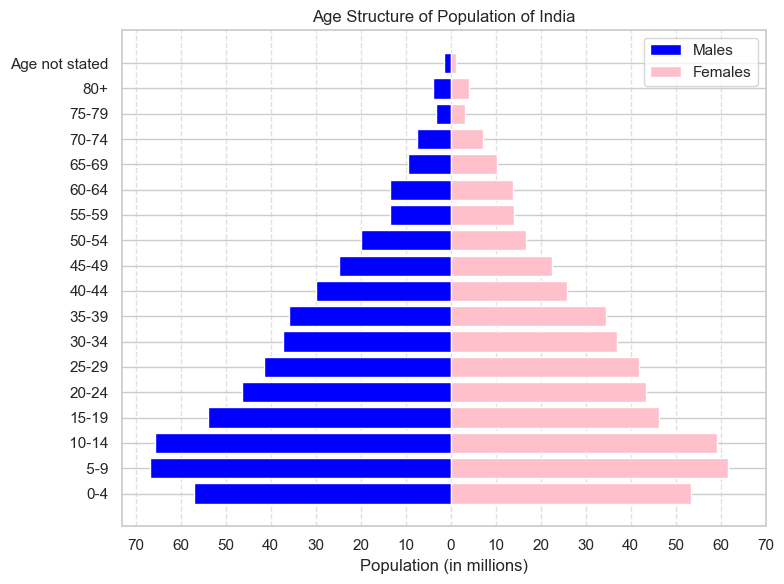

In [8]:
df_pop_structure = pd.read_csv("../dataset/population_pyramid_age_sex.csv");
display(df_pop_structure)
df_pop_structure["Males"] = df_pop_structure["Males"] / 1e6  # Convert to millions
df_pop_structure["Females"] = df_pop_structure["Females"] / 1e6  # Convert to millions

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
y_pos = range(len(df_pop_structure))

ax.barh(y_pos, -df_pop_structure["Males"], color='blue', label='Males')  # Negative for left side
ax.barh(y_pos, df_pop_structure["Females"], color='pink', label='Females')

ax.set_yticks(y_pos)
ax.set_yticklabels(df_pop_structure["Age-group"])
ax.set_xlabel("Population (in millions)")
ax.set_title("Age Structure of Population of India")

# Configure X-axis to be symmetric
xticks = list(range(-70, 71, 10))
ax.set_xticks(xticks)
ax.set_xticklabels([abs(x) for x in xticks])

ax.legend(loc="upper right")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.show()

##### Source: Census Of India, Table: B-01, C -14 <br> Link: https://censusindia.gov.in/census.website/data/tables<br>
##### India’s population pyramid remains bottom-heavy, reflecting a large youth base, typical of a developing nation compared to developed countries with ageing populations.<br>According to UN 2024 data: 25% of the population is under 14, 68% is in the working-age group (15–64), Only 7% is aged 65 and above<br>
With a median age of 28, India stands to benefit from a demographic dividend if adequately harnessed through education, employment, and skill developmen.


### <br><br>Distribution of Population based on Settlement Size as Per Census 2011


,Settlement Type,1951,1961,1971,1981,1991,2001,2011
0,Hamlets (%),43,37,31,25,19,15,12
1,Small villages (%),20,21,21,20,19,18,16
2,Medium villages (%),17,18,20,21,22,23,23
3,Large villages (%),5,8,10,12,14,16,15
4,Class IV–VI cities (%),5,4,3,3,3,3,4
5,Class III cities (%),3,3,3,3,3,3,4
6,Class II cities (%),2,2,2,3,3,3,3
7,Class I (.1-1 m) (%),1,2,4,6,7,8,10
8,Million-plus cities (%),3,4,5,6,9,11,12


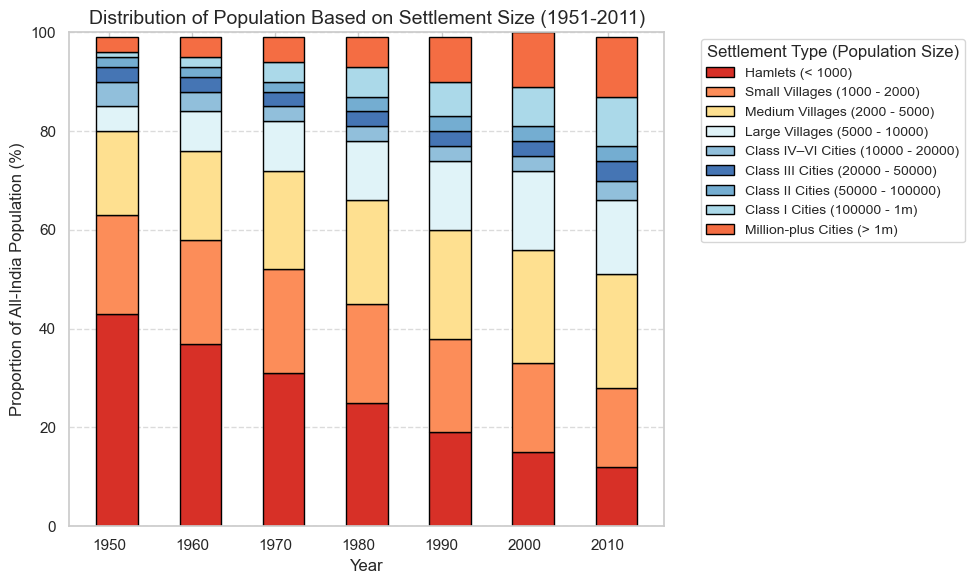

In [9]:
df_pop_set = pd.read_csv("../dataset/population_settlement.csv");
display(df_pop_set)
category_descriptions = [
    "Hamlets (< 1000)",
    "Small Villages (1000 - 2000)",
    "Medium Villages (2000 - 5000)",
    "Large Villages (5000 - 10000)",
    "Class IV–VI Cities (10000 - 20000)",
    "Class III Cities (20000 - 50000)",
    "Class II Cities (50000 - 100000)",
    "Class I Cities (100000 - 1m)",
    "Million-plus Cities (> 1m)",
]
years = [1951, 1961, 1971, 1981, 1991, 2001, 2011]
data_values = df_pop_set.iloc[:, 1:].to_numpy()
colors = [
    "#d73027", "#fc8d59", "#fee090", "#e0f3f8", "#91bfdb",
    "#4575b4", "#74add1", "#abd9e9", "#f46d43"
]

# Plotting the stacked bar chart with enhanced legend descriptions
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 5

# Plot each category on top of the previous one
cumulative_values = np.zeros(len(years))
for i, description in enumerate(category_descriptions):
    ax.bar(
        years,
        data_values[i],
        bottom=cumulative_values,
        color=colors[i],
        label=description,
        edgecolor="black",
        width=bar_width,
    )
    cumulative_values += data_values[i]

# Add labels and title
ax.set_title("Distribution of Population Based on Settlement Size (1951-2011)", fontsize=14)
ax.set_ylabel("Proportion of All-India Population (%)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylim(0, 100)  # Set y-axis limits to 0-100%

# Add an enhanced legend
ax.legend(
    loc="upper left", bbox_to_anchor=(1.05, 1), title="Settlement Type (Population Size)", fontsize=10
)

# Display the grid for better readability
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


##### Source: Census of India, Table: A-04 <br> Link: https://censusindia.gov.in/census.website/data/tables 
#### Share of hamlets dropped from 43% to 12%, indicating rural consolidation.<br>Growth of Medium and Large Villages<br>Class I cities (population >100,000) rose from 1% to 10%.<br>Million-plus cities grew from 3% to 12%, showing rapid urbanization.<br>Challenges in Urban Growth, Rise in slums and vulnerable migrant populations.<br>Stagnant Growth in Small Towns (Class II–IV).